## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import random
import numpy as np
from math import ceil
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
X.shape

(50,)

In [ ]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

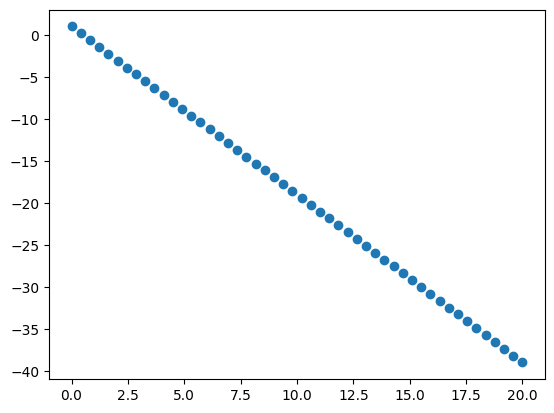

In [ ]:
plt.scatter(X, y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [ ]:
def gradient_descent(x: np.array, y: np.array, alpha: float, max_iterations: int) -> tuple:
    '''
    A Function to apply linear regression on multivariant data using vanilla gradient descent.
    It iterates for max_iterations to find the best fit line, and stops before that number if we reached the minimum (we don't see a noticeable improvement in the cost).

    Args:
        x (np.array): Input feature with shape (m, n), where m is the number of observations and n is the number of features.
        y (np.array): Target value with shape (m, 1), where m is the number of observations.
        alpha (float): Learning rate.
        max_iterations (int): Maximum number of iterations for gradient descent.

    Returns:
        theta_values, training_loss, y_predict, theta_0, theta_1 (tuple): Final values of theta_0 and theta_1 (model parameters) as well as training loss per epoch.
    '''

     # Check the input parameters
    assert x.shape[0] == y.shape[0], "x and y must have the same length."
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    m, n = x.shape[0], x.shape[1]     # Get number of observations => m , number of features/variables => n


    y_predict = np.zeros(shape=y.shape)     # Initialize the predicted vector
    training_loss = []          # List to store the training loss
    theta_values = [[], []]           # List to store the theta values

    ones_column = np.ones(shape=(m, 1))       # Initialize the ones column to be added to the x samples
    x_new = np.concatenate((ones_column, x), axis=1)
    thetas = np.zeros(shape=(n+1, 1))    # Initialize the model parameters



    # Training Loop
    for iteration in range(max_iterations):

        print(f"\n****************** Iteration {iteration} ********************")


        # Get the predicted value by substituting in the linear equation (Predict values)
        y_predict = x_new @ thetas
        print('\nPredicted Variable h(x):', y_predict)


        # Get the error
        error = y_predict - y
        cost = np.sum(error ** 2) / (2 * m)
        print('\nError Vector:\n', error)
        print('\nCost Function (J):\n', cost)

        # Append the loss
        training_loss.append(cost)

        # Append the theta values
        print(thetas[0], thetas[1])
        theta_values[0].append(thetas[0].flatten())
        theta_values[1].append(thetas[1].flatten())


        # Get the gradient components
        thetas_gradient = (x_new.T @ error) / m


        # Get the gradient vector & its norm
        gradient_norm = np.linalg.norm(thetas_gradient)
        print('\nGradient Vector:\n', thetas_gradient)
        print('\nGradient Vector Norm: ', gradient_norm)


        # If the cost doesn't get improved noticeably or the gradient gets updated slowly (vanishing gradient) then exit the training
        theta_new = thetas - (alpha * thetas_gradient)
        new_cost = np.sum(((x_new @ theta_new) - y) ** 2) / (2 * m)
        if ((cost - new_cost) < 0.001) or (gradient_norm < 0.001):
            break


        # Update parameters
        thetas -= alpha * thetas_gradient
        print('\ntheta_new: ', thetas)



    # Get the training report
    print("\n****************** Training Report ********************")

    print(f"\nGradient Descent converged after {iteration+1} epochs")
    print('theta_Opt: ', thetas)

    y_predict = x_new @ theta_new
    print('\nError Vector:\n', (y_predict - y))
    print('\nCost:', np.sum((y_predict - y) ** 2) / (2 * m))
    print('\nh(x) = y_predict:\n', y_predict)
    print('\ny_actual:\n', y)


    return theta_values, training_loss, y_predict, thetas[0], thetas[1]

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [ ]:
theta_values, training_loss, y_predict, theta_0, theta_1 = gradient_descent(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, max_iterations=300)

Streaming output truncated to the last 5000 lines.
 [-1.75084406]]

****************** Iteration 35 ********************

Predicted Variable h(x): [[ -0.12509607]
 [ -0.83972629]
 [ -1.55435652]
 [ -2.26898675]
 [ -2.98361698]
 [ -3.6982472 ]
 [ -4.41287743]
 [ -5.12750766]
 [ -5.84213789]
 [ -6.55676812]
 [ -7.27139834]
 [ -7.98602857]
 [ -8.7006588 ]
 [ -9.41528903]
 [-10.12991925]
 [-10.84454948]
 [-11.55917971]
 [-12.27380994]
 [-12.98844017]
 [-13.70307039]
 [-14.41770062]
 [-15.13233085]
 [-15.84696108]
 [-16.5615913 ]
 [-17.27622153]
 [-17.99085176]
 [-18.70548199]
 [-19.42011222]
 [-20.13474244]
 [-20.84937267]
 [-21.5640029 ]
 [-22.27863313]
 [-22.99326335]
 [-23.70789358]
 [-24.42252381]
 [-25.13715404]
 [-25.85178427]
 [-26.56641449]
 [-27.28104472]
 [-27.99567495]
 [-28.71030518]
 [-29.4249354 ]
 [-30.13956563]
 [-30.85419586]
 [-31.56882609]
 [-32.28345632]
 [-32.99808654]
 [-33.71271677]
 [-34.427347  ]
 [-35.14197723]]

Error Vector:
 [[-1.12509607]
 [-1.02339976]
 [-0.9

#### Calculate r2 score

In [ ]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

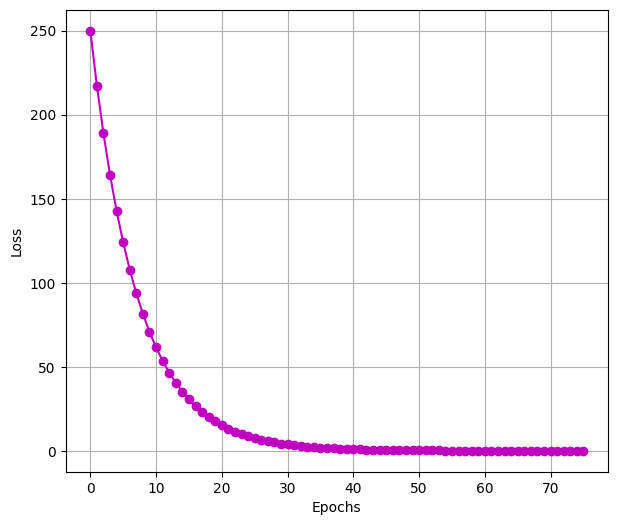

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(training_loss)), training_loss, color='m', marker='o')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [ ]:
theta_values

[[array([0.]),
  array([-0.0095]),
  array([-0.01834678]),
  array([-0.02658458]),
  array([-0.03425463]),
  array([-0.0413954]),
  array([-0.04804271]),
  array([-0.05422999]),
  array([-0.05998839]),
  array([-0.06534696]),
  array([-0.07033277]),
  array([-0.07497107]),
  array([-0.07928539]),
  array([-0.08329768]),
  array([-0.08702838]),
  array([-0.09049657]),
  array([-0.09372002]),
  array([-0.09671532]),
  array([-0.09949791]),
  array([-0.10208219]),
  array([-0.1044816]),
  array([-0.10670866]),
  array([-0.10877505]),
  array([-0.11069163]),
  array([-0.11246857]),
  array([-0.11411531]),
  array([-0.11564067]),
  array([-0.11705288]),
  array([-0.1183596]),
  array([-0.11956798]),
  array([-0.12068467]),
  array([-0.12171588]),
  array([-0.12266741]),
  array([-0.12354466]),
  array([-0.12435264]),
  array([-0.12509607]),
  array([-0.1257793]),
  array([-0.12640642]),
  array([-0.12698122]),
  array([-0.12750726]),
  array([-0.12798783]),
  array([-0.12842602]),
  array([

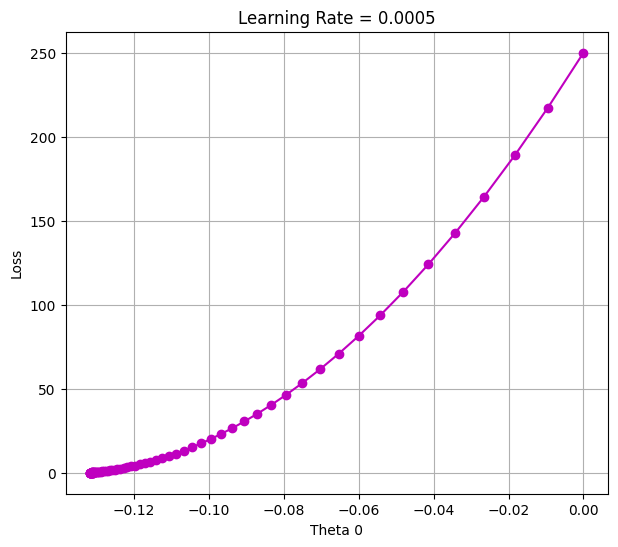

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[0], training_loss, color='m', marker='o')
plt.grid()
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.show()

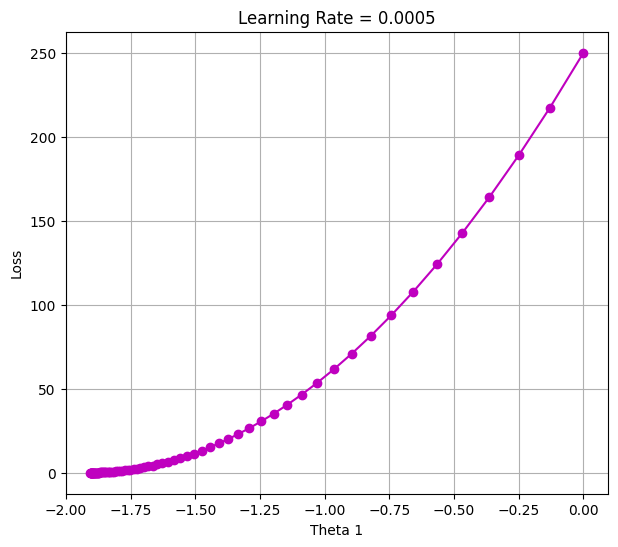

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[1], training_loss, color='m', marker='o')
plt.grid()
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.show()

#### Plot all regression lines till converge

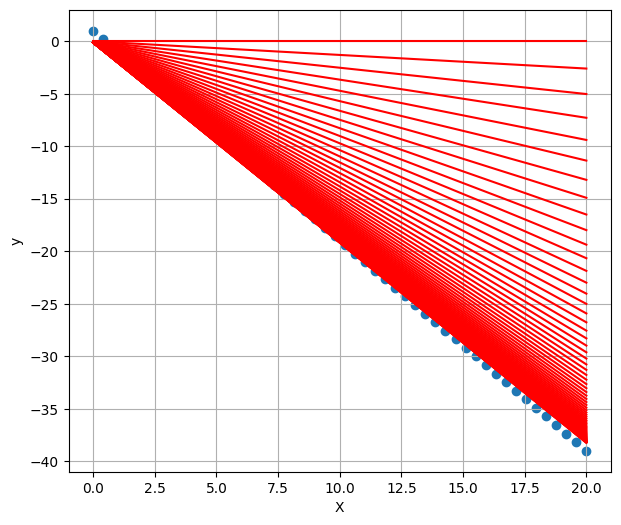

In [ ]:
plt.figure(figsize=(7, 6))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')

for theta_0, theta_1 in zip(theta_values[0], theta_values[1]):
  y_pred = theta_0 + theta_1 * X
  plt.plot(X, y_pred, color='r')

plt.scatter(X, y)
plt.show()

#### Plot the best regression line

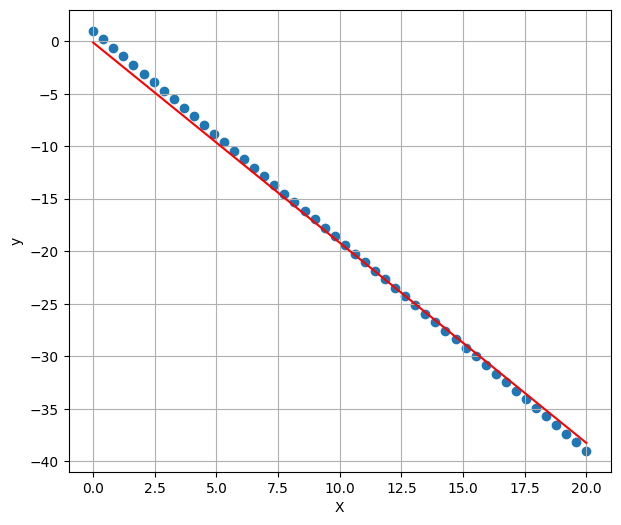

In [ ]:
plt.figure(figsize=(7, 6))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y_predict, color='r')
plt.scatter(X, y)
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [ ]:
theta_values, training_loss, y_predict, theta_0, theta_1 = gradient_descent(X.reshape(50, 1), y.reshape(50, 1), alpha=0.00005, max_iterations=1000)

Streaming output truncated to the last 5000 lines.
 [-1.87271583]]

****************** Iteration 559 ********************

Predicted Variable h(x): [[ -0.13110437]
 [ -0.89547817]
 [ -1.65985198]
 [ -2.42422579]
 [ -3.18859959]
 [ -3.9529734 ]
 [ -4.71734721]
 [ -5.48172101]
 [ -6.24609482]
 [ -7.01046863]
 [ -7.77484243]
 [ -8.53921624]
 [ -9.30359005]
 [-10.06796385]
 [-10.83233766]
 [-11.59671147]
 [-12.36108527]
 [-13.12545908]
 [-13.88983289]
 [-14.65420669]
 [-15.4185805 ]
 [-16.1829543 ]
 [-16.94732811]
 [-17.71170192]
 [-18.47607572]
 [-19.24044953]
 [-20.00482334]
 [-20.76919714]
 [-21.53357095]
 [-22.29794476]
 [-23.06231856]
 [-23.82669237]
 [-24.59106618]
 [-25.35543998]
 [-26.11981379]
 [-26.8841876 ]
 [-27.6485614 ]
 [-28.41293521]
 [-29.17730901]
 [-29.94168282]
 [-30.70605663]
 [-31.47043043]
 [-32.23480424]
 [-32.99917805]
 [-33.76355185]
 [-34.52792566]
 [-35.29229947]
 [-36.05667327]
 [-36.82104708]
 [-37.58542089]]

Error Vector:
 [[-1.13110437]
 [-1.07915164]
 [-1.

In [ ]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9965793400861428


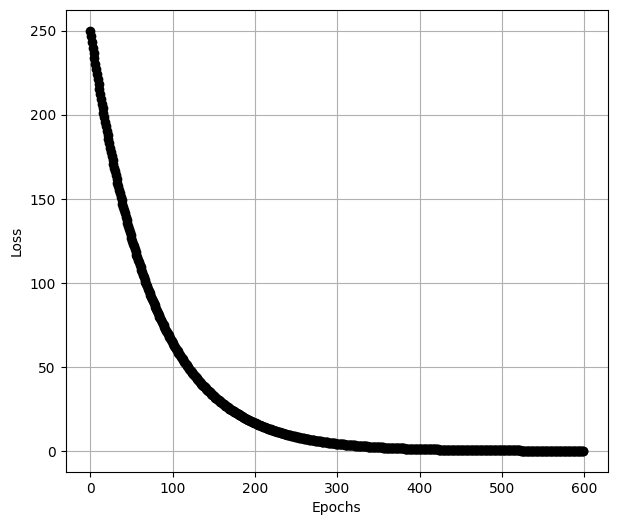

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(training_loss)), training_loss, color='black', marker='o')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

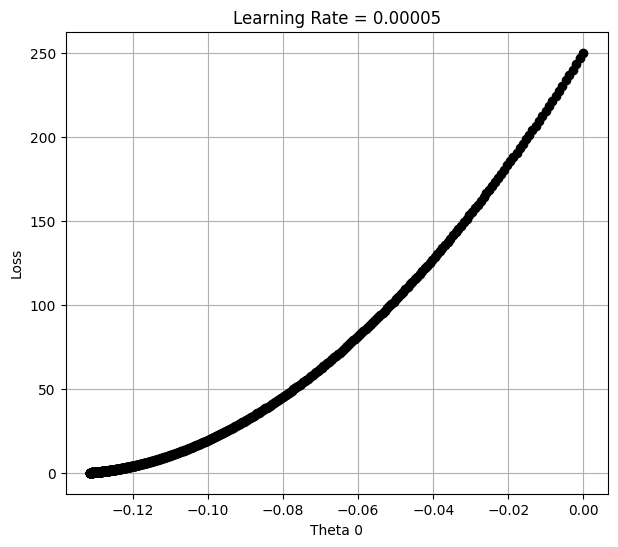

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[0], training_loss, color='black', marker='o')
plt.grid()
plt.title('Learning Rate = 0.00005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.show()

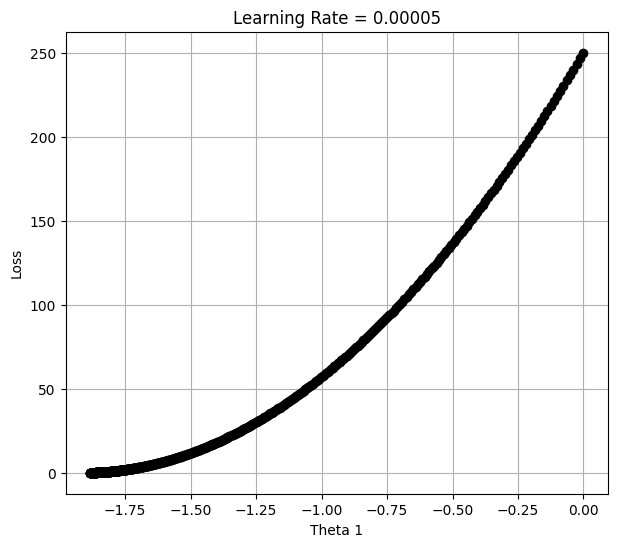

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[1], training_loss, color='black', marker='o')
plt.grid()
plt.title('Learning Rate = 0.00005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.show()

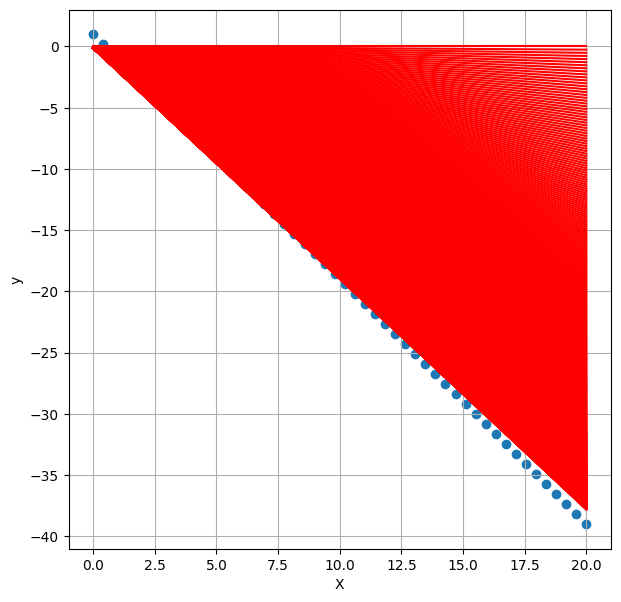

In [ ]:
plt.figure(figsize=(7, 7))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')

for theta_0, theta_1 in zip(theta_values[0], theta_values[1]):
  y_pred = theta_0 + theta_1 * X
  plt.plot(X, y_pred, color='r')

plt.scatter(X, y)
plt.show()

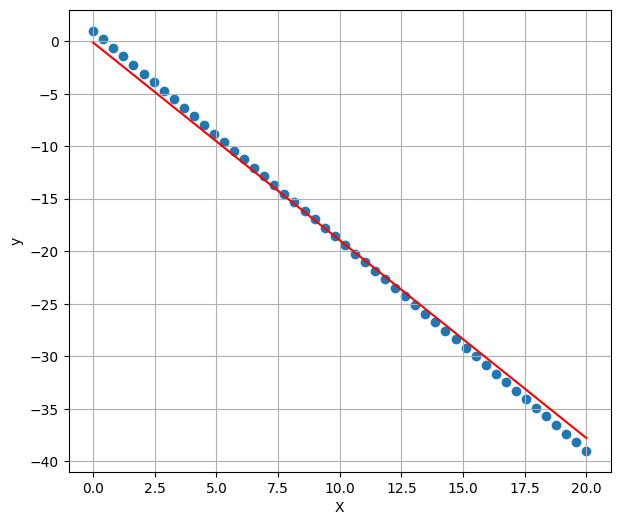

In [ ]:
plt.figure(figsize=(7, 6))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y_predict, color='r')
plt.scatter(X, y)
plt.show()

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [ ]:
theta_values, training_loss, y_predict, theta_0, theta_1 = gradient_descent(X.reshape(50, 1), y.reshape(50, 1), alpha=0.005, max_iterations=300)


****************** Iteration 0 ********************

Predicted Variable h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector:
 [[-1.        ]
 [-0.18367347]
 [ 0.63265306]
 [ 1.44897959]
 [ 2.26530612]
 [ 3.08163265]
 [ 3.89795918]
 [ 4.71428571]
 [ 5.53061224]
 [ 6.34693878]
 [ 7.16326531]
 [ 7.97959184]
 [ 8.79591837]
 [ 9.6122449 ]
 [10.42857143]
 [11.24489796]
 [12.06122449]
 [12.87755102]
 [13.69387755]
 [14.51020408]
 [15.32653061]
 [16.14285714]
 [16.95918367]
 [17.7755102 ]
 [18.59183673]
 [19.40816327]
 [20.2244898 ]
 [21.04081633]
 [21.85714286]
 [22.67346939]
 [23.48979592]
 [24.30612245]
 [25.12244898]
 [25.93877551]
 [26.75510204]
 [27.57142857]
 [28.3877551 ]
 [29.20408163]
 [30.02040816]
 [30.83673469]
 [31

In [ ]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9976200723230484


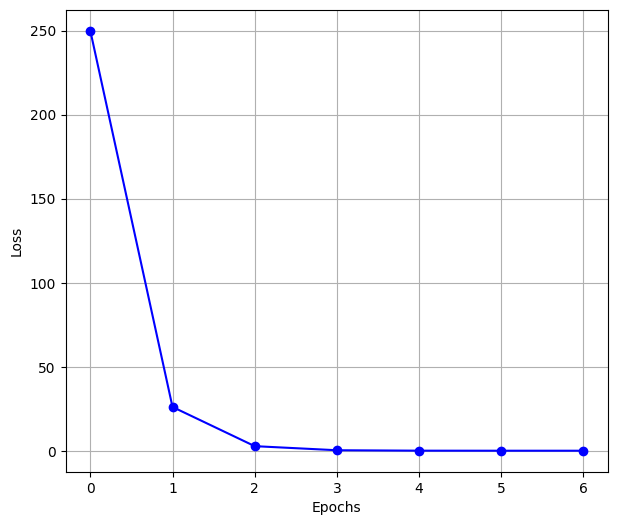

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(training_loss)), training_loss, color='b', marker='o')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

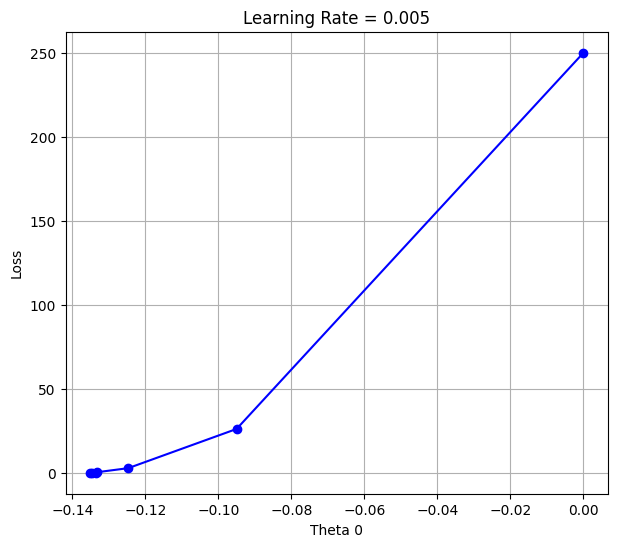

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[0], training_loss, color='b', marker='o')
plt.grid()
plt.title('Learning Rate = 0.005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.show()

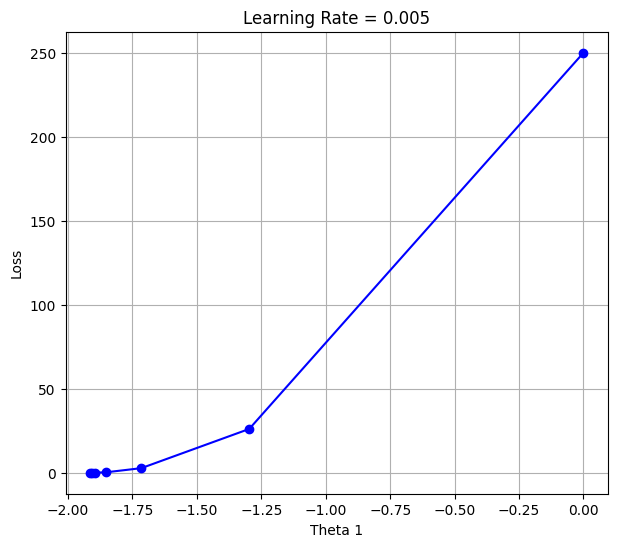

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[1], training_loss, color='b', marker='o')
plt.grid()
plt.title('Learning Rate = 0.005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.show()

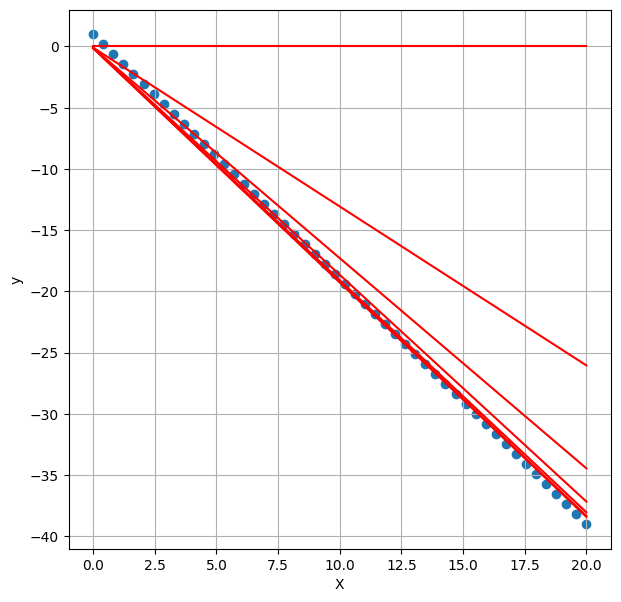

In [ ]:
plt.figure(figsize=(7, 7))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')

for theta_0, theta_1 in zip(theta_values[0], theta_values[1]):
  y_pred = theta_0 + theta_1 * X
  plt.plot(X, y_pred, color='r')

plt.scatter(X, y)
plt.show()

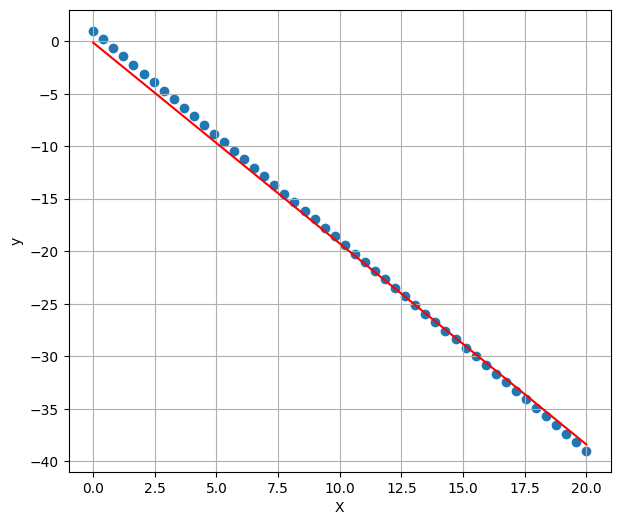

In [ ]:
plt.figure(figsize=(7, 6))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y_predict, color='r')
plt.scatter(X, y)
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [ ]:
def sgd(x: np.array, y: np.array, alpha: float, max_iterations: int, seed : int=42) -> tuple:
    '''
    A function to apply Stochastic Gradient Descent (SGD) for linear regression on multivariant data.

    Args:
        x (np.array): Input feature with shape (m, n), where m is the number of observations and n is the number of features.
        y (np.array): Target value with shape (m, 1), where m is the number of observations.
        alpha (float): Learning rate.
        max_iterations (int): Maximum number of iterations for gradient descent.
        seed (int) : A number to ensure the reproducability of the results.

    Returns:
        theta_values, training_loss, y_predict, theta_values[0], theta_values[-1] (tuple): Final values of theta_0 and theta_1 (model parameters) as well as training loss per epoch and the total thetas accumulated.
    '''

     # Check the input parameters
    assert len(x) == len(y), "x and y must have the same length."
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."


    np.random.seed(seed)  # Ensure reproducibility

    m, n = x.shape[0], x.shape[1]     # Get number of observations => m , number of features/variables => n


    y_predict = np.zeros(shape=y.shape)     # Initialize the predicted vector
    training_loss = []          # List to store the training loss
    theta_values = [[], []]           # List to store the theta values

    ones_column = np.ones(shape=(m, 1))       # Initialize the ones column to be added to the x samples
    x_new = np.concatenate((ones_column, x), axis=1)
    thetas = np.zeros(shape=(n+1, 1))    # Initialize the model parameters



    # Training Loop
    for epoch in range(max_iterations):

        print(f"\n****************** Epoch {epoch} ********************")

        total_pred = x_new @ thetas
        old_epoch_cost = np.sum((total_pred - y) ** 2) / (2 * m)

        # Shuffle the data
        indices = np.random.permutation(m)             # Shuffle data
        x_shuffled, y_shuffled = x_new[indices][:], y[indices][:]


        for datapoint_x, datapoint_y in zip(x_shuffled, y_shuffled):

          datapoint_x = datapoint_x.reshape(1, n+1)
          datapoint_y = datapoint_y.reshape(1, 1)

          # Get the predicted value by substituting in the linear equation (Predict values)
          y_predict = datapoint_x @ thetas

          # Get the error
          error = y_predict - datapoint_y
          cost = (error ** 2) / (2 * 1)

          # Append the loss
          training_loss.append(cost.flatten())

          # Append the theta values
          theta_values[0].append(thetas[0].flatten())
          theta_values[1].append(thetas[1].flatten())


          # Get the gradient components
          thetas_gradient = (error * datapoint_x).reshape(n+1, 1)


          # Get the gradient vector & its norm
          gradient_norm = np.linalg.norm(thetas_gradient)


          # Update parameters
          thetas -= alpha * thetas_gradient


        print('\nCost Function (J):\n', cost)
        print('\nGradient Vector:\n', thetas_gradient)
        print('\nGradient Vector Norm: ', gradient_norm)

        # Convergence check
        total_pred = x_new @ thetas
        new_epoch_cost = np.sum((total_pred - y) ** 2) / (2 * m)

        # If the cost doesn't get improved noticeably or the gradient gets updated slowly (vanishing gradient) then exit the training
        if ((old_epoch_cost - new_epoch_cost) < 0.001) or (gradient_norm < 0.001):
              break

        print('\nthetas_new: ', thetas)



    # Get the training report
    print("\n****************** Training Report ********************")

    print(f"\nGradient Descent converged after {epoch+1} epochs")
    print('theta_0_Opt: ', theta_values[0][0])
    print('theta_1_Opt: ', theta_values[1][-1])

    y_predict = x_new @ thetas
    print('\nError Vector:\n', (y_predict - y))
    print('\nCost:', np.sum((total_pred - y) ** 2) / (2 * m))


    return theta_values, training_loss, y_predict, theta_values[0][-1], theta_values[1][-1]

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [ ]:
theta_values, training_loss, y_predict, theta_0, theta_1 = sgd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, max_iterations=300)


****************** Epoch 0 ********************

Cost Function (J):
 [[0.60573432]]

Gradient Vector:
 [[ 1.10066736]
 [17.07157545]]

Gradient Vector Norm:  17.107020694095908

thetas_new:  [[-0.12753385]
 [-1.86491093]]

****************** Epoch 1 ********************

Cost Function (J):
 [[0.34926536]]

Gradient Vector:
 [[-0.83578151]
 [-2.72908247]]

Gradient Vector Norm:  2.8541937308927445

thetas_new:  [[-0.1233403]
 [-1.9104426]]

****************** Epoch 2 ********************

Cost Function (J):
 [[0.18687104]]

Gradient Vector:
 [[-0.61134448]
 [-3.99245376]]

Gradient Vector Norm:  4.038988621430261

thetas_new:  [[-0.11683561]
 [-1.92055364]]

****************** Epoch 3 ********************

Cost Function (J):
 [[0.20420024]]

Gradient Vector:
 [[-0.63906218]
 [-3.6517839 ]]

Gradient Vector Norm:  3.7072801481312987

thetas_new:  [[-0.10926686]
 [-1.91583237]]

****************** Epoch 4 ********************

Cost Function (J):
 [[0.57540937]]

Gradient Vector:
 [[-1.07

In [ ]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9976991974859073


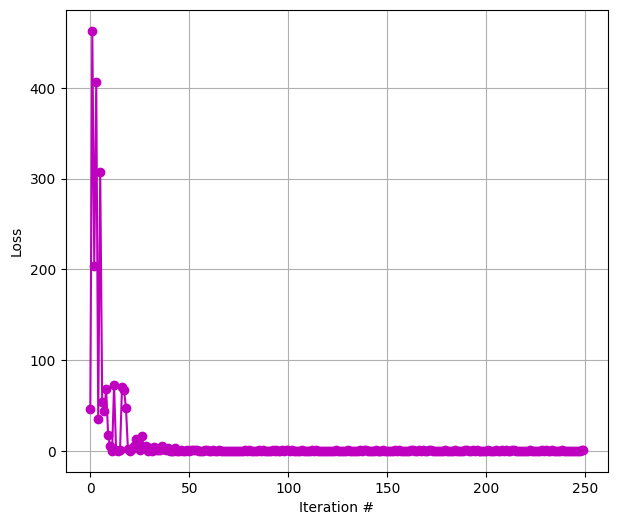

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(training_loss)), training_loss, color='m', marker='o')
plt.grid()
plt.xlabel('Iteration #')
plt.ylabel('Loss')
plt.show()

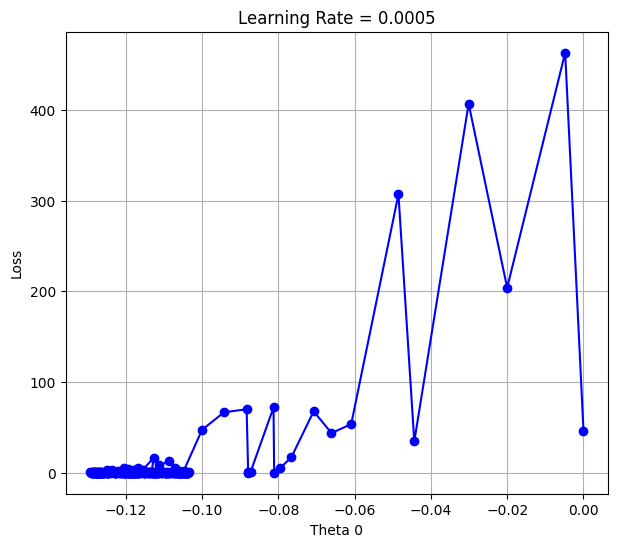

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[0], training_loss, color='b', marker='o')
plt.grid()
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.show()

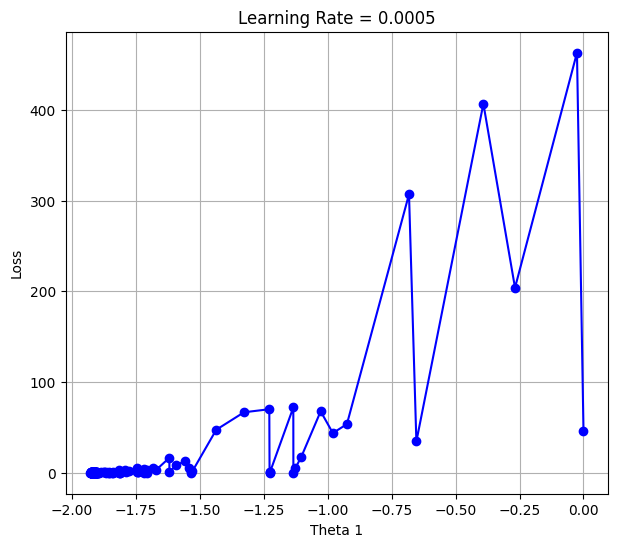

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[1], training_loss, color='b', marker='o')
plt.grid()
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.show()

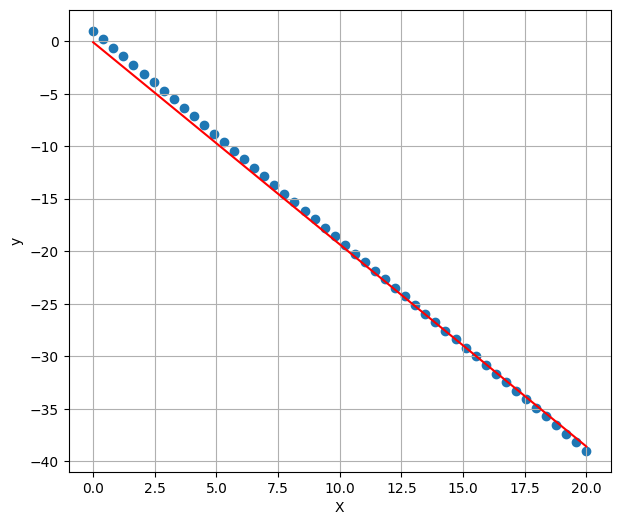

In [ ]:
plt.figure(figsize=(7, 6))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y_predict, color='r')
plt.scatter(X, y)
plt.show()

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [ ]:
theta_values, training_loss, y_predict, theta_0, theta_1 = sgd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0001, max_iterations=300)


****************** Epoch 0 ********************

Cost Function (J):
 [[121.46906549]]

Gradient Vector:
 [[ 15.58647269]
 [241.74937236]]

Gradient Vector Norm:  242.25130994295003

thetas_new:  [[-0.06887406]
 [-0.95044386]]

****************** Epoch 1 ********************

Cost Function (J):
 [[0.29144191]]

Gradient Vector:
 [[0.76346829]
 [2.49295768]]

Gradient Vector Norm:  2.60724410091728

thetas_new:  [[-0.1024258 ]
 [-1.42884261]]

****************** Epoch 2 ********************

Cost Function (J):
 [[0.53600413]]

Gradient Vector:
 [[1.03537832]
 [6.76165433]]

Gradient Vector Norm:  6.840466178559447

thetas_new:  [[-0.11905167]
 [-1.67079493]]

****************** Epoch 3 ********************

Cost Function (J):
 [[0.00185262]]

Gradient Vector:
 [[0.06087069]
 [0.34783249]]

Gradient Vector Norm:  0.3531185085130529

thetas_new:  [[-0.12658277]
 [-1.79223149]]

****************** Epoch 4 ********************

Cost Function (J):
 [[0.57303148]]

Gradient Vector:
 [[-1.0705

In [ ]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9976473405255567


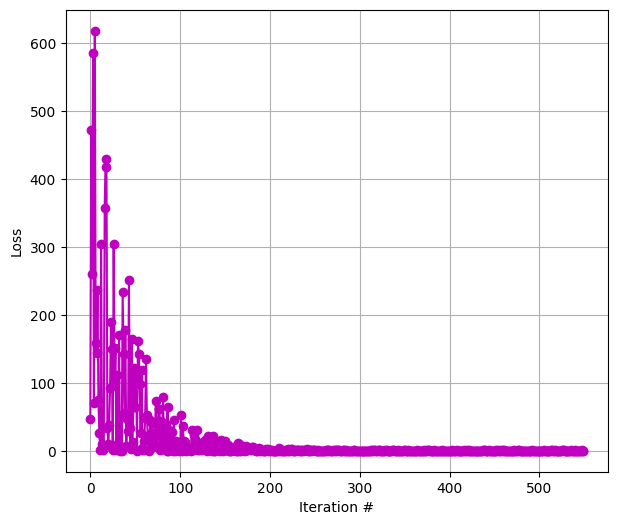

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(training_loss)), training_loss, color='m', marker='o')
plt.grid()
plt.xlabel('Iteration #')
plt.ylabel('Loss')
plt.show()

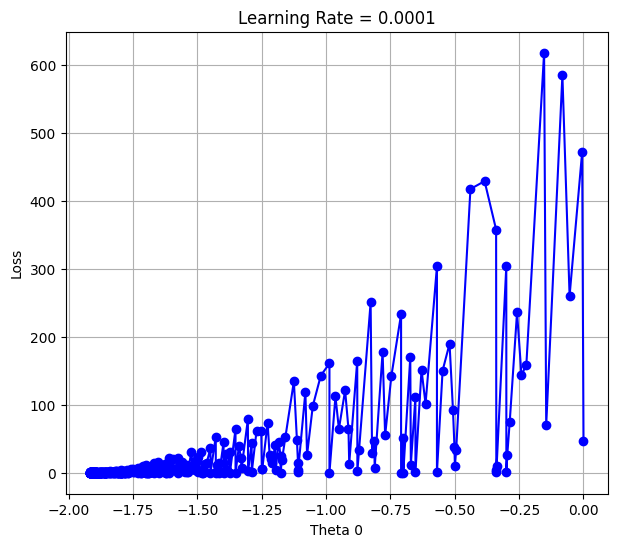

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[1], training_loss, color='b', marker='o')
plt.grid()
plt.title('Learning Rate = 0.0001')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.show()

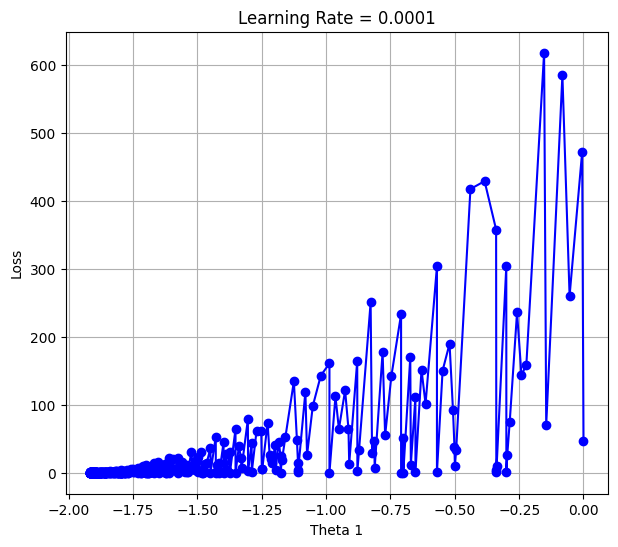

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[1], training_loss, color='b', marker='o')
plt.grid()
plt.title('Learning Rate = 0.0001')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.show()

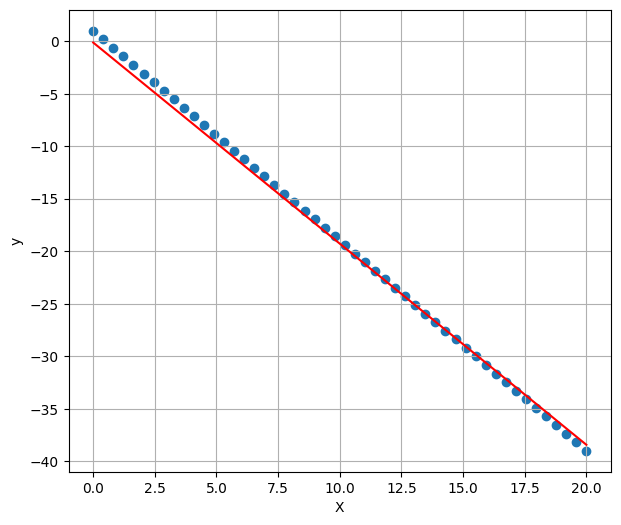

In [ ]:
plt.figure(figsize=(7, 6))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y_predict, color='r')
plt.scatter(X, y)
plt.show()

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [ ]:
theta_values, training_loss, y_predict, theta_0, theta_1 = sgd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.00007, max_iterations=300)


****************** Epoch 0 ********************

Cost Function (J):
 [[180.46694181]]

Gradient Vector:
 [[ 18.99826002]
 [294.66689004]]

Gradient Vector Norm:  295.2786988067478

thetas_new:  [[-0.05293153]
 [-0.72793823]]

****************** Epoch 1 ********************

Cost Function (J):
 [[1.27527141]]

Gradient Vector:
 [[1.5970419 ]
 [5.21483068]]

Gradient Vector Norm:  5.453897861026036

thetas_new:  [[-0.08508254]
 [-1.17899867]]

****************** Epoch 2 ********************

Cost Function (J):
 [[2.96391233]]

Gradient Vector:
 [[ 2.43471244]
 [15.90016285]]

Gradient Vector Norm:  16.085490463034017

thetas_new:  [[-0.10497326]
 [-1.45912474]]

****************** Epoch 3 ********************

Cost Function (J):
 [[0.48531988]]

Gradient Vector:
 [[0.98521051]
 [5.62977435]]

Gradient Vector Norm:  5.715330171861261

thetas_new:  [[-0.1168089 ]
 [-1.63255276]]

****************** Epoch 4 ********************

Cost Function (J):
 [[0.51830139]]

Gradient Vector:
 [[-1.01

In [ ]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9976344643032381


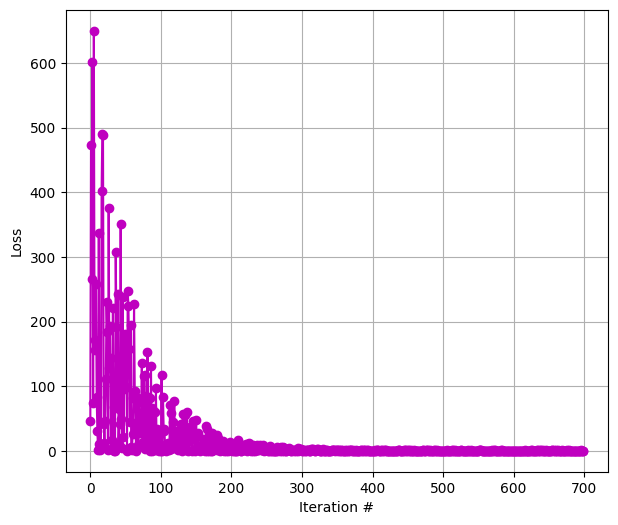

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(training_loss)), training_loss, color='m', marker='o')
plt.grid()
plt.xlabel('Iteration #')
plt.ylabel('Loss')
plt.show()

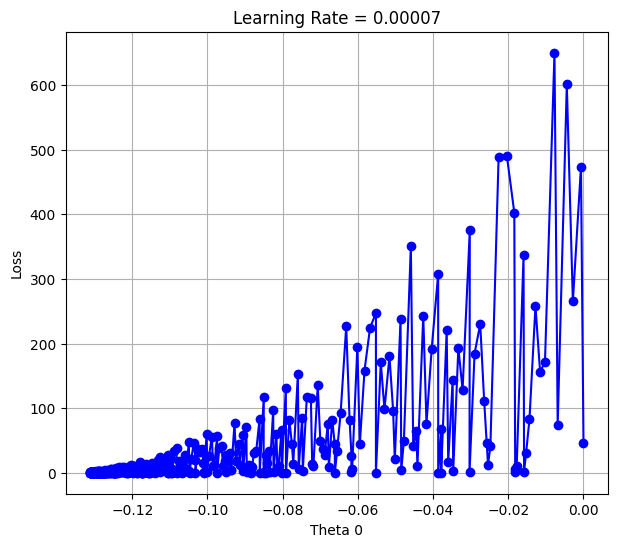

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[0], training_loss, color='b', marker='o')
plt.grid()
plt.title('Learning Rate = 0.00007')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.show()

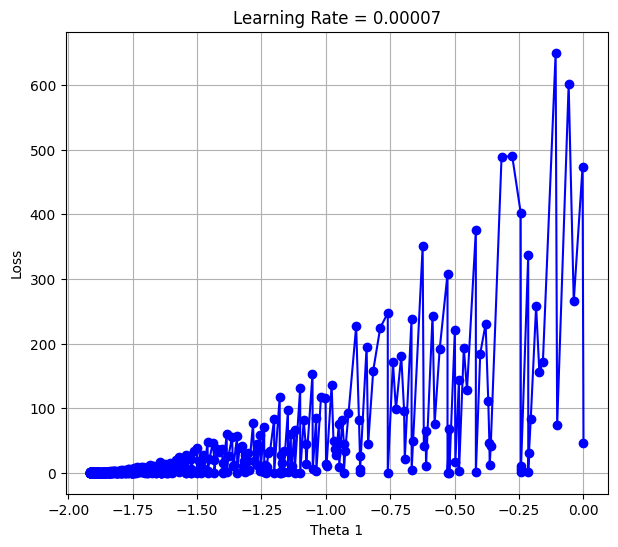

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[1], training_loss, color='b', marker='o')
plt.grid()
plt.title('Learning Rate = 0.00007')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.show()

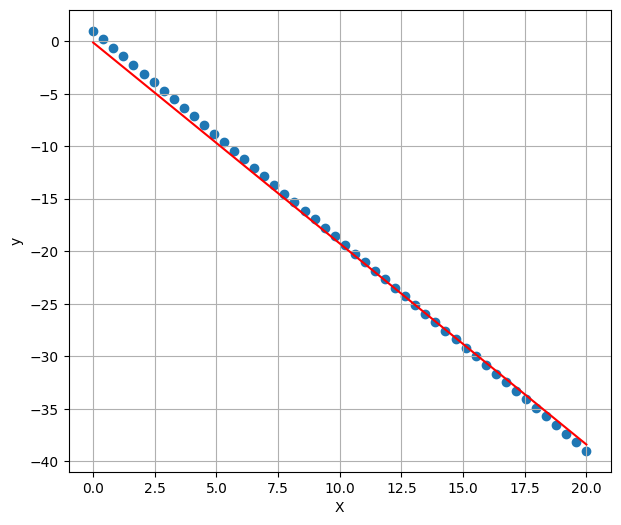

In [ ]:
plt.figure(figsize=(7, 6))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y_predict, color='r')
plt.scatter(X, y)
plt.show()

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [ ]:
def mini_batch_gd(x, y, alpha: float, max_iterations: int, batch_size : int=62, seed : int=42) -> tuple:
    '''
    A function to apply Mini Batch Gradient Descent for linear regression.

    Args:
        x (np.array): Input feature with shape (m, n), where m is the number of observations and n is the number of features.
        y (np.array): Target value with shape (m, 1), where m is the number of observations.
        alpha (float): Learning rate.
        max_iterations (int): Maximum number of iterations for gradient descent.
        batch_size (int): Size of each Data Batch.
        seed (int): Random seed for reproducibility.

    Returns:
        theta_values, training_loss, y_predict, theta_values[0][-1], theta_1_values[1][-1] (tuple): Final values of theta_0 and theta_1 (model parameters) as well as training loss per epoch and the total thetas accumulated.
    '''

    # Check the input parameters
    assert len(x) == len(y), "x and y must have the same length."
    assert alpha > 0, "alpha must be a positive float."
    assert max_iterations > 0, "max_iterations must be a positive integer."

    np.random.seed(seed)  # Seed To Ensure reproducibility

    m, n = x.shape[0], x.shape[1]     # Get number of observations => m , number of features/variables => n

    y_predict = np.zeros(shape=y.shape)     # Initialize the predicted vector

    training_loss = []          # List to store the training loss
    theta_values = [[], []]           # List to store the theta values

    ones_column = np.ones(shape=(m, 1))       # Initialize the ones column to be added to the x samples
    x_new = np.concatenate((ones_column, x), axis=1)
    thetas = np.zeros(shape=(n+1, 1))    # Initialize the model parameters

    n_batches = ceil(m / batch_size)     # Get the total number of batches per each epoch

    # Training Loop
    for epoch in range(max_iterations):

        print(f"\n****************** Epoch {epoch} ********************")


        total_pred = x_new @ thetas
        old_epoch_cost = np.sum((total_pred - y) ** 2) / (2 * m) # Get the cost for whole datapoints before beginning the current epoch


        # Shuffle the data
        indices = np.random.permutation(m)  # Shuffle data
        x_shuffled, y_shuffled = x_new[indices][:], y[indices][:]


        # For each batch
        for batch in range(n_batches):

          start = batch * batch_size
          end = min(start + batch_size, m)
          data_x, data_y = x_shuffled[start:end][:], y_shuffled[start:end][:]


          # Get the predicted value by substituting in the linear equation (Predict values)
          y_predict = data_x @ thetas


          # Get the error
          error = y_predict - data_y
          cost = np.sum(error ** 2) / (2 * data_y.shape[0])

          # Append the loss
          training_loss.append(cost)


          # Append the theta values
          theta_values[0].append(thetas[0].flatten())
          theta_values[1].append(thetas[1].flatten())


          # Get the gradient components
          thetas_gradient = (data_x.T @ error) / data_y.shape[0]


          # Get the gradient vector & its norm
          gradient_norm = np.linalg.norm(thetas_gradient)


          # Update parameters
          thetas -= alpha * thetas_gradient



        print('\nCost Function (J):\n', cost)
        print('\nGradient Vector:\n', thetas_gradient)
        print('\nGradient Vector Norm: ', gradient_norm)


        # Convergence check
        total_pred = x_new @ thetas
        new_epoch_cost = np.sum((total_pred - y) ** 2) / (2 * m)

        # If the cost doesn't get improved noticeably or the gradient gets updated slowly (vanishing gradient) then exit the training
        if ((old_epoch_cost - new_epoch_cost) < 0.001) or (gradient_norm < 0.001):
              break

        print('\ntheta_0_new: ', thetas[0].flatten())
        print('theta_1_new: ', thetas[1].flatten())



    # Get the training report
    print("\n****************** Training Report ********************")

    print(f"\nGradient Descent converged after {epoch+1} epochs")
    print('theta_0_Opt: ', theta_values[0][-1])
    print('theta_1_Opt: ', theta_values[1][-1])

    y_predict = x_new @ thetas
    print('\nCost:', np.sum((y_predict - y)**2) / (2 * m))


    return theta_values, training_loss, y_predict, theta_values[0][-1], theta_values[1][-1]


##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [ ]:
theta_values, training_loss, y_predict, theta_0, theta_1 = mini_batch_gd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, max_iterations=300, batch_size=5)


****************** Epoch 0 ********************

Cost Function (J):
 74.29116816731104

Gradient Vector:
 [[ 10.56609266]
 [144.71245929]]

Gradient Vector Norm:  145.09768498799664

theta_0_new:  [-0.07024581]
theta_1_new:  [-0.96785678]

****************** Epoch 1 ********************

Cost Function (J):
 6.061794219120249

Gradient Vector:
 [[ 2.60108968]
 [26.434538  ]]

Gradient Vector Norm:  26.56219996067496

theta_0_new:  [-0.10376019]
theta_1_new:  [-1.44611128]

****************** Epoch 2 ********************

Cost Function (J):
 5.288100040964759

Gradient Vector:
 [[ 2.61346737]
 [40.15776712]]

Gradient Vector Norm:  40.24271949168801

theta_0_new:  [-0.12007653]
theta_1_new:  [-1.68390311]

****************** Epoch 3 ********************

Cost Function (J):
 1.081028210285828

Gradient Vector:
 [[ 1.08975045]
 [16.35530135]]

Gradient Vector Norm:  16.39156607696949

theta_0_new:  [-0.12729334]
theta_1_new:  [-1.80090962]

****************** Epoch 4 ********************


In [ ]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.997639969678478


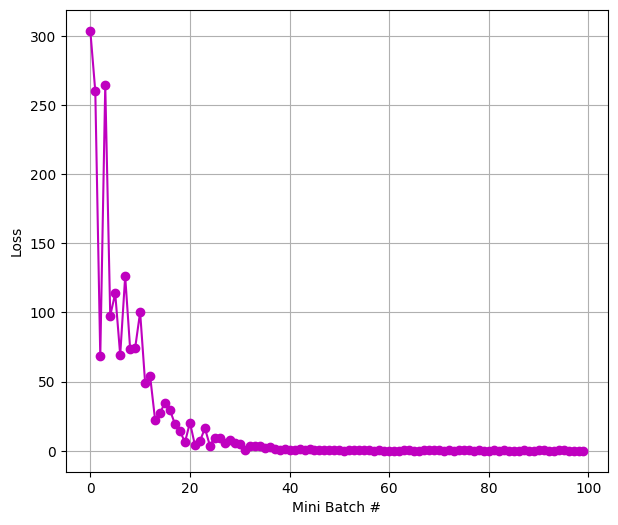

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(training_loss)), training_loss, color='m', marker='o')
plt.grid()
plt.xlabel('Mini Batch #')
plt.ylabel('Loss')
plt.show()

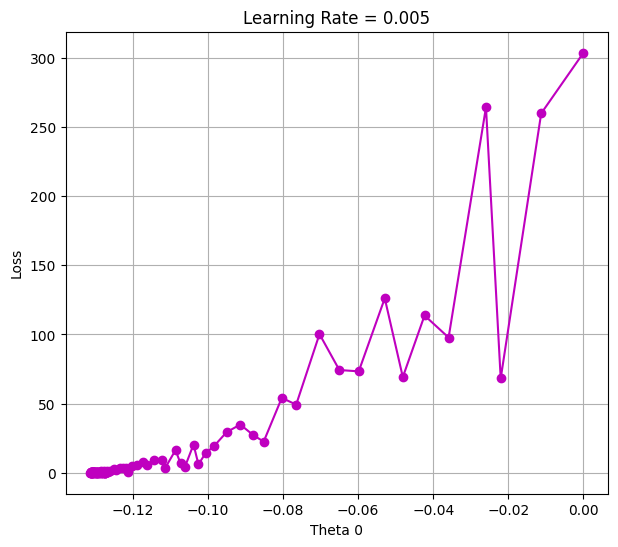

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[0], training_loss, color='m', marker='o')
plt.grid()
plt.title('Learning Rate = 0.005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.show()

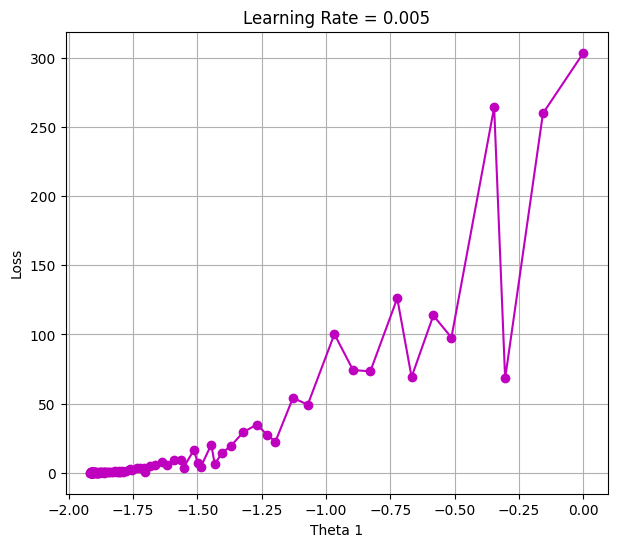

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[1], training_loss, color='m', marker='o')
plt.grid()
plt.title('Learning Rate = 0.005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.show()

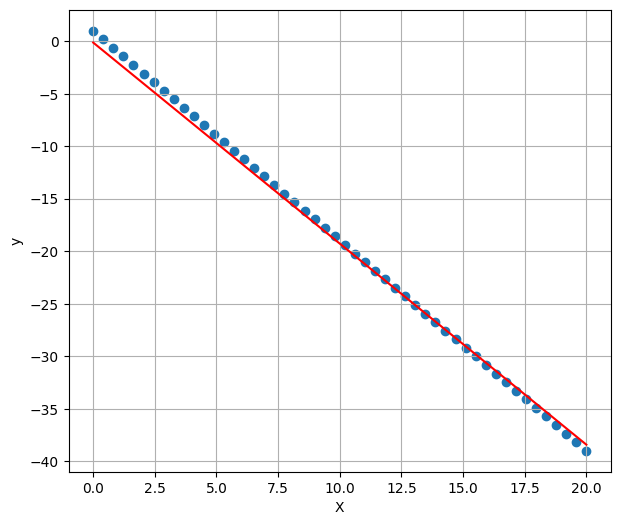

In [ ]:
plt.figure(figsize=(7, 6))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y_predict, color='r')
plt.scatter(X, y)
plt.show()

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [ ]:
theta_values, training_loss, y_predict, theta_0, theta_1 = mini_batch_gd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, max_iterations=300, batch_size=10)


****************** Epoch 0 ********************

Cost Function (J):
 139.34179965527267

Gradient Vector:
 [[ 14.44695585]
 [191.98864238]]

Gradient Vector Norm:  192.5314346705448

theta_0_new:  [-0.04130008]
theta_1_new:  [-0.56661813]

****************** Epoch 1 ********************

Cost Function (J):
 40.53065811551007

Gradient Vector:
 [[ 6.96480396]
 [82.29784139]]

Gradient Vector Norm:  82.59202862498192

theta_0_new:  [-0.07004062]
theta_1_new:  [-0.96591191]

****************** Epoch 2 ********************

Cost Function (J):
 46.57926366051455

Gradient Vector:
 [[  8.43579404]
 [125.44116507]]

Gradient Vector Norm:  125.72449449585875

theta_0_new:  [-0.09029618]
theta_1_new:  [-1.24703572]

****************** Epoch 3 ********************

Cost Function (J):
 12.574455842653787

Gradient Vector:
 [[ 4.03992862]
 [50.98778485]]

Gradient Vector Norm:  51.14758280835142

theta_0_new:  [-0.10428074]
theta_1_new:  [-1.44492412]

****************** Epoch 4 *****************

In [ ]:
print('r2_score: ', r2_score(y, y_predict))

r2_score:  0.9976312061405038


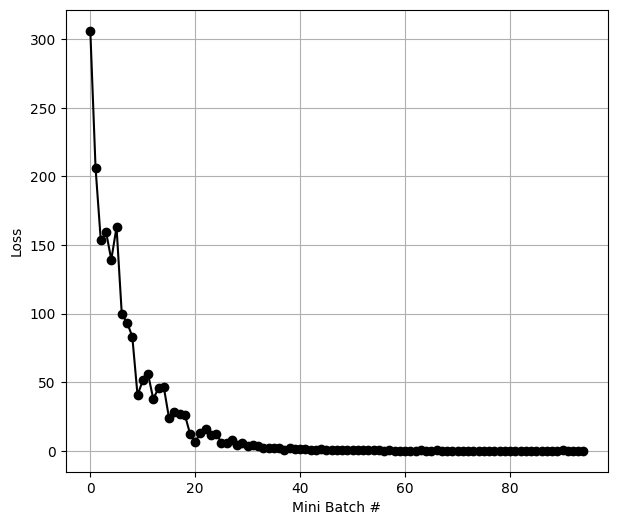

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(training_loss)), training_loss, color='black', marker='o')
plt.grid()
plt.xlabel('Mini Batch #')
plt.ylabel('Loss')
plt.show()

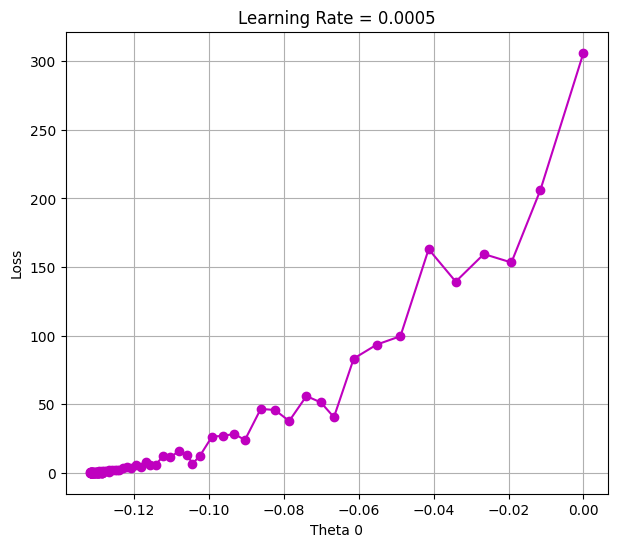

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[0], training_loss, color='m', marker='o')
plt.grid()
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.show()

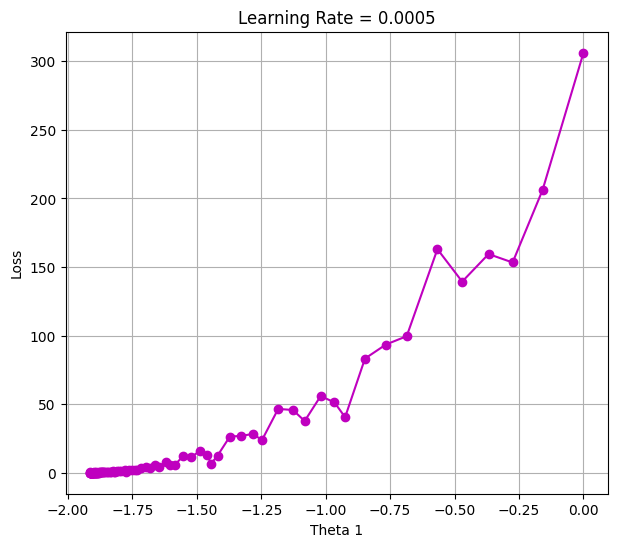

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[1], training_loss, color='m', marker='o')
plt.grid()
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.show()

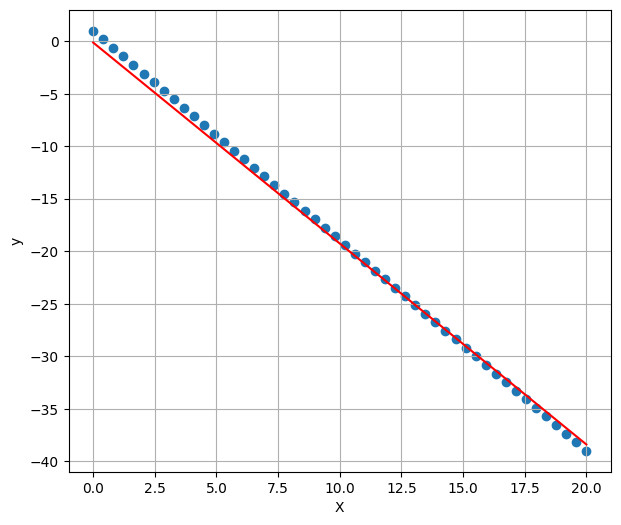

In [ ]:
plt.figure(figsize=(7, 6))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y_predict, color='r')
plt.scatter(X, y)
plt.show()

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [ ]:
theta_values, training_loss, y_predict, theta_0, theta_1 = mini_batch_gd(X.reshape(50, 1), y.reshape(50, 1), alpha=0.0005, max_iterations=300, batch_size=20)


****************** Epoch 0 ********************

Cost Function (J):
 184.7907669210801

Gradient Vector:
 [[ 16.67799946]
 [221.11877515]]

Gradient Vector Norm:  221.74685654639163

theta_0_new:  [-0.02659701]
theta_1_new:  [-0.3623404]

****************** Epoch 1 ********************

Cost Function (J):
 73.65116456947217

Gradient Vector:
 [[  9.53241347]
 [111.06392783]]

Gradient Vector Norm:  111.47225202198186

theta_0_new:  [-0.04711906]
theta_1_new:  [-0.63978456]

****************** Epoch 2 ********************

Cost Function (J):
 108.3982285194547

Gradient Vector:
 [[ 12.99532209]
 [191.50187568]]

Gradient Vector Norm:  191.94230066760107

theta_0_new:  [-0.06521089]
theta_1_new:  [-0.89182134]

****************** Epoch 3 ********************

Cost Function (J):
 40.262403727660576

Gradient Vector:
 [[ 7.48672024]
 [91.62869135]]

Gradient Vector Norm:  91.9340418924754

theta_0_new:  [-0.07893193]
theta_1_new:  [-1.07914722]

****************** Epoch 4 ****************

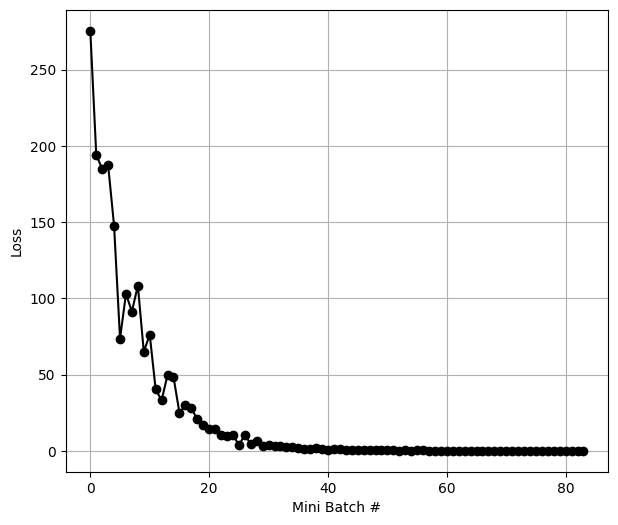

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(training_loss)), training_loss, color='black', marker='o')
plt.grid()
plt.xlabel('Mini Batch #')
plt.ylabel('Loss')
plt.show()

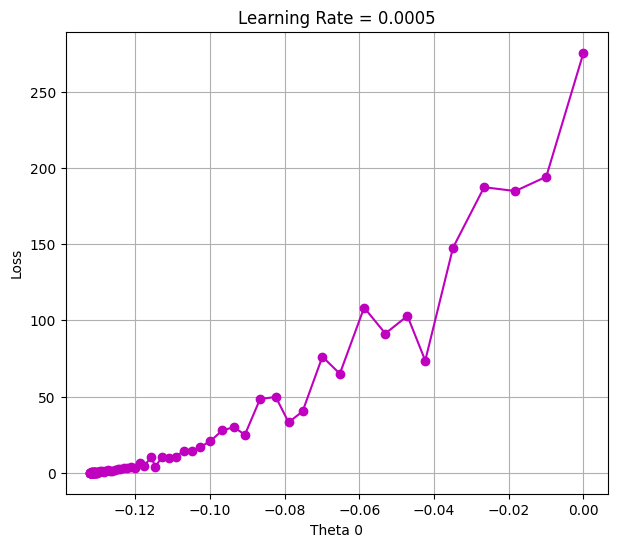

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[0], training_loss, color='m', marker='o')
plt.grid()
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 0')
plt.ylabel('Loss')
plt.show()

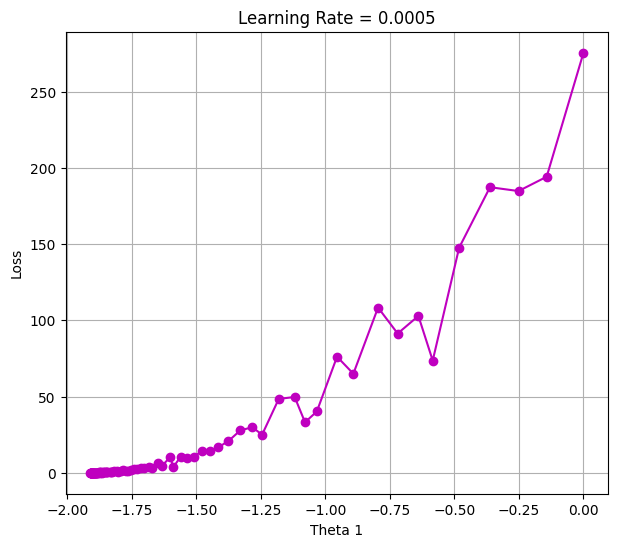

In [ ]:
plt.figure(figsize=(7, 6))
plt.plot(theta_values[1], training_loss, color='m', marker='o')
plt.grid()
plt.title('Learning Rate = 0.0005')
plt.xlabel('Theta 1')
plt.ylabel('Loss')
plt.show()

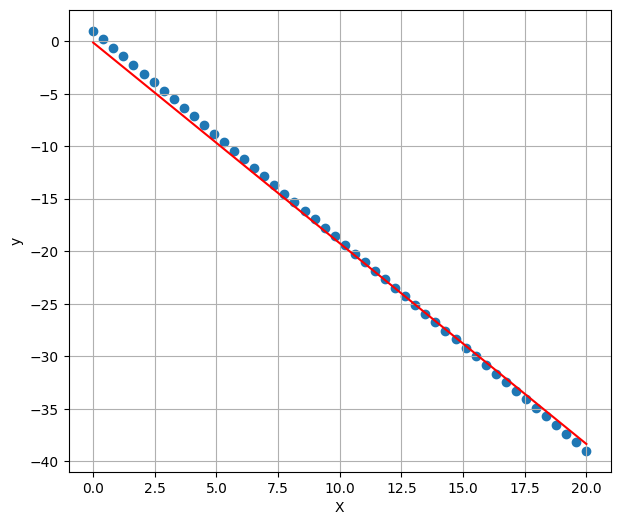

In [ ]:
plt.figure(figsize=(7, 6))
plt.grid()
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X, y_predict.flatten(), color='r')
plt.scatter(X, y)
plt.show()